#Trainieren Modell für die Datensätze

In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
from pathlib import Path
# Hauptordner-Pfad
path = Path("/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM")
%cd "/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM"

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM


In [3]:
%%capture
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
!pip install torch-geometric==1.7.2


In [4]:
%%capture
!pip install dive-into-graphs

In [5]:
%%capture
!pip install pm4py

In [9]:
import torch
import joblib
from torch_geometric.data import DataLoader


from models.gcn3_neu import *


# Module für das Preprocessing der verwendeten Datensätze
from preprocessing.loanApplication import *
from preprocessing.reviewSynthetic import *
from train_gcn import Train_GCN, create_splitted_dataloader

In [10]:
# Verwendete Laufzeit-Umgebung definieren (GPU oder CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Datensatz laden

In [11]:
# Laden eines bereits vorverarbeiteten Datensazes
dataset_name = "loan_sn_f2_ohe_wEvents_4_nreb"
dataset = torch.load(path / str("datasets/dataset_"+ dataset_name))
feature  = joblib.load("datasets/encoder_" + dataset_name + ".joblib")


In [13]:
batch_size= 100
train_loader, val_loader, test_loader =  create_splitted_dataloader(dataset, batch_size)

## Modelle initialisieren

In [14]:
# GCN initialisieren
# Model Variablen
hidden_channel = 100
num_layer = 3
input_dim = dataset.num_features
gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)

## Parameter Tuning

In [15]:
from utilities_parameter_tuning import save_plots, save_hyperparam, create_run, run_tuning

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/loan_sn_f2_ohe_wEvents_4_nreb/run_1
save Hyperparameter
Epoch: 001, Train Acc: 0.8551, Validation Acc: 0.8588, Loss Training: 0.3387, Loss Validation: 0.3329
Epoch: 002, Train Acc: 0.8533, Validation Acc: 0.8574, Loss Training: 0.3468, Loss Validation: 0.3400
Epoch: 003, Train Acc: 0.8520, Validation Acc: 0.8563, Loss Training: 0.3562, Loss Validation: 0.3491
Epoch: 004, Train Acc: 0.8518, Validation Acc: 0.8558, Loss Training: 0.3549, Loss Validation: 0.3484
Epoch: 005, Train Acc: 0.8506, Validation Acc: 0.8547, Loss Training: 0.3683, Loss Validation: 0.3613
Epoch: 006, Train Acc: 0.8545, Validation Acc: 0.8582, Loss Training: 0.3348, Loss Validation: 0.3292
Epoch: 007, Train Acc: 0.8520, Validation Acc: 0.8561, Loss Training: 0.3506, Loss Validation: 0.3437
Epoch: 008, Train Acc: 0.8515, Validation Acc: 0.8555, Loss Training: 0.3571, Loss Validation: 0.3504
Epoch: 009, Train Acc: 0.8523, Validation Acc: 0.8563, Loss Tr

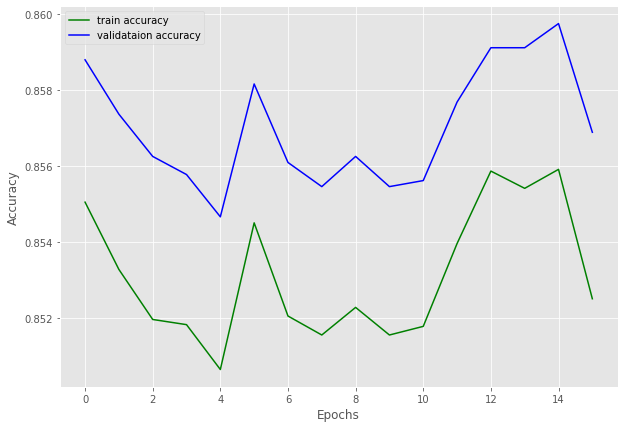

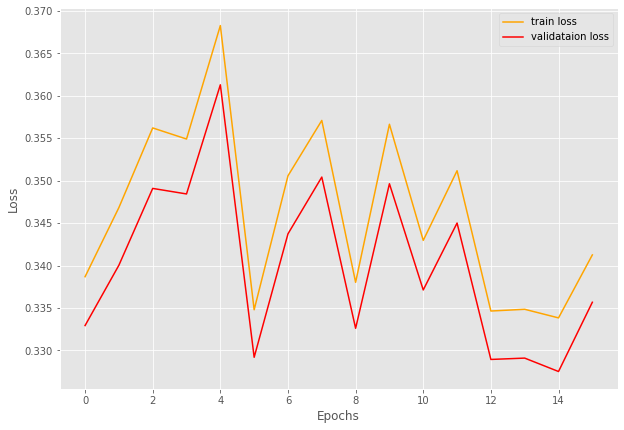

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.05, "num_epochs": 17}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/loan_sn_f2_ohe_wEvents_4_nreb/run_2
save Hyperparameter
Epoch: 001, Train Acc: 0.8544, Validation Acc: 0.8583, Loss Training: 0.3403, Loss Validation: 0.3348
Epoch: 002, Train Acc: 0.8613, Validation Acc: 0.8663, Loss Training: 0.3296, Loss Validation: 0.3234
Epoch: 003, Train Acc: 0.8638, Validation Acc: 0.8691, Loss Training: 0.3214, Loss Validation: 0.3154
Epoch: 004, Train Acc: 0.8663, Validation Acc: 0.8703, Loss Training: 0.3141, Loss Validation: 0.3086
Epoch: 005, Train Acc: 0.8678, Validation Acc: 0.8715, Loss Training: 0.3090, Loss Validation: 0.3040
Epoch: 006, Train Acc: 0.8717, Validation Acc: 0.8741, Loss Training: 0.2986, Loss Validation: 0.2945
Epoch: 007, Train Acc: 0.8717, Validation Acc: 0.8741, Loss Training: 0.3009, Loss Validation: 0.2968
Epoch: 008, Train Acc: 0.8772, Validation Acc: 0.8768, Loss Training: 0.2937, Loss Validation: 0.2904
Epoch: 009, Train Acc: 0.8788, Validation Acc: 0.8803, Loss Tr

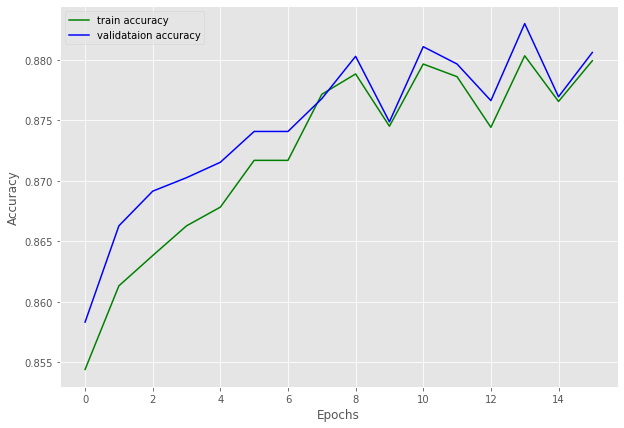

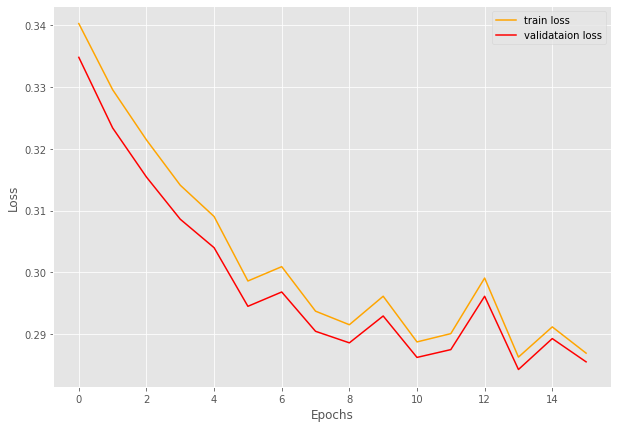

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.001, "num_epochs": 17}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/loan_sn_f2_ohe_wEvents_4_nreb/run_3
save Hyperparameter
Epoch: 001, Train Acc: 0.8554, Validation Acc: 0.8588, Loss Training: 0.3265, Loss Validation: 0.3225
Epoch: 002, Train Acc: 0.8558, Validation Acc: 0.8606, Loss Training: 0.3216, Loss Validation: 0.3157
Epoch: 003, Train Acc: 0.8732, Validation Acc: 0.8741, Loss Training: 0.2964, Loss Validation: 0.2926
Epoch: 004, Train Acc: 0.8804, Validation Acc: 0.8836, Loss Training: 0.2883, Loss Validation: 0.2842
Epoch: 005, Train Acc: 0.8771, Validation Acc: 0.8792, Loss Training: 0.2896, Loss Validation: 0.2859
Epoch: 006, Train Acc: 0.8782, Validation Acc: 0.8793, Loss Training: 0.2917, Loss Validation: 0.2883
Epoch: 007, Train Acc: 0.8787, Validation Acc: 0.8805, Loss Training: 0.2867, Loss Validation: 0.2844
Epoch: 008, Train Acc: 0.8794, Validation Acc: 0.8789, Loss Training: 0.2879, Loss Validation: 0.2865
Epoch: 009, Train Acc: 0.8787, Validation Acc: 0.8808, Loss Tr

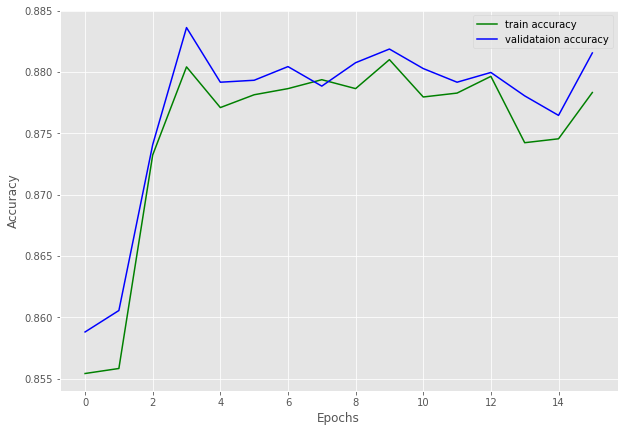

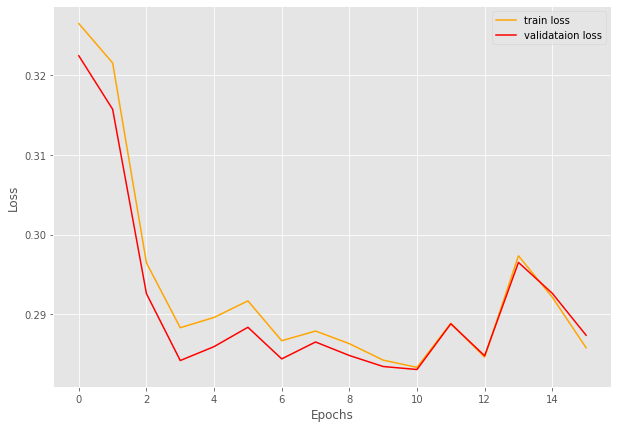

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.005, "num_epochs": 17}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/loan_sn_f2_ohe_wEvents_4_nreb/run_4
save Hyperparameter
Epoch: 001, Train Acc: 0.8516, Validation Acc: 0.8553, Loss Training: 0.4813, Loss Validation: 0.4814
Epoch: 002, Train Acc: 0.8597, Validation Acc: 0.8658, Loss Training: 0.3569, Loss Validation: 0.3565
Epoch: 003, Train Acc: 0.8579, Validation Acc: 0.8631, Loss Training: 0.3452, Loss Validation: 0.3434
Epoch: 004, Train Acc: 0.8582, Validation Acc: 0.8637, Loss Training: 0.3387, Loss Validation: 0.3358
Epoch: 005, Train Acc: 0.8610, Validation Acc: 0.8663, Loss Training: 0.3347, Loss Validation: 0.3311
Epoch: 006, Train Acc: 0.8621, Validation Acc: 0.8676, Loss Training: 0.3323, Loss Validation: 0.3282
Epoch: 007, Train Acc: 0.8622, Validation Acc: 0.8679, Loss Training: 0.3307, Loss Validation: 0.3262
Epoch: 008, Train Acc: 0.8630, Validation Acc: 0.8680, Loss Training: 0.3292, Loss Validation: 0.3247
Epoch: 009, Train Acc: 0.8633, Validation Acc: 0.8684, Loss Tr

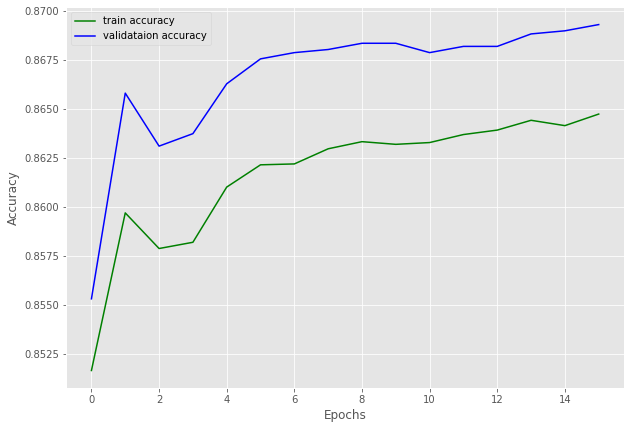

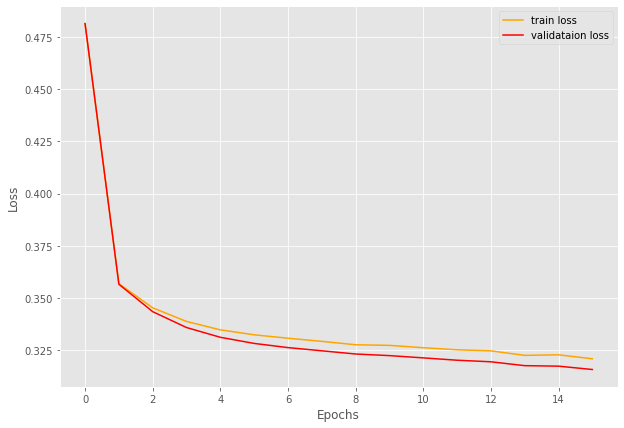

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.0001, "num_epochs": 17}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/loan_sn_f2_ohe_wEvents_4_nreb/run_5
save Hyperparameter
Epoch: 001, Train Acc: 0.8562, Validation Acc: 0.8607, Loss Training: 0.3357, Loss Validation: 0.3321
Epoch: 002, Train Acc: 0.8555, Validation Acc: 0.8602, Loss Training: 0.3335, Loss Validation: 0.3280
Epoch: 003, Train Acc: 0.8560, Validation Acc: 0.8604, Loss Training: 0.3316, Loss Validation: 0.3259
Epoch: 004, Train Acc: 0.8613, Validation Acc: 0.8655, Loss Training: 0.3259, Loss Validation: 0.3203
Epoch: 005, Train Acc: 0.8668, Validation Acc: 0.8707, Loss Training: 0.3104, Loss Validation: 0.3055
Epoch: 006, Train Acc: 0.8713, Validation Acc: 0.8723, Loss Training: 0.3046, Loss Validation: 0.2998
Epoch: 007, Train Acc: 0.8734, Validation Acc: 0.8741, Loss Training: 0.3008, Loss Validation: 0.2963
Epoch: 008, Train Acc: 0.8730, Validation Acc: 0.8749, Loss Training: 0.2999, Loss Validation: 0.2955
Epoch: 009, Train Acc: 0.8758, Validation Acc: 0.8784, Loss Tr

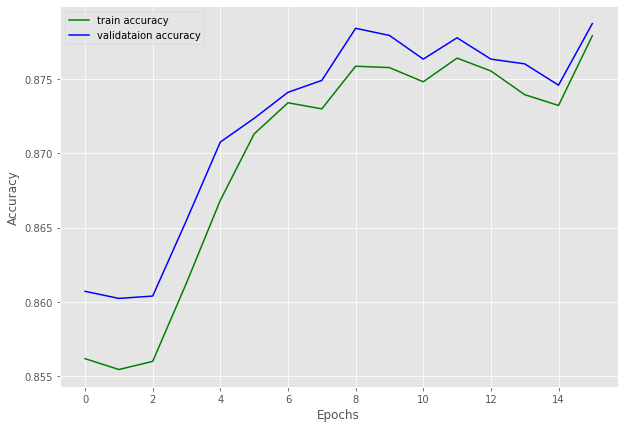

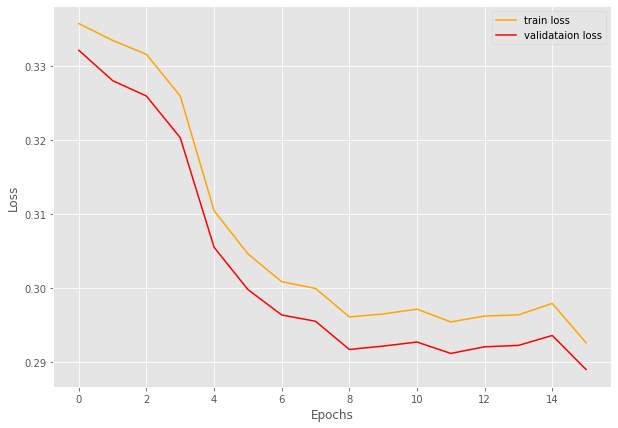

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.0005, "num_epochs": 17}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

<IPython.core.display.Javascript object>

/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/tuning/loan_sn_f2_ohe_wEvents_4_nreb/run_6
save Hyperparameter
Epoch: 001, Train Acc: 0.5481, Validation Acc: 0.5486, Loss Training: 0.6871, Loss Validation: 0.6870
Epoch: 002, Train Acc: 0.5481, Validation Acc: 0.5486, Loss Training: 0.6841, Loss Validation: 0.6840
Epoch: 003, Train Acc: 0.5481, Validation Acc: 0.5486, Loss Training: 0.6784, Loss Validation: 0.6784
Epoch: 004, Train Acc: 0.5481, Validation Acc: 0.5486, Loss Training: 0.6695, Loss Validation: 0.6695
Epoch: 005, Train Acc: 0.7409, Validation Acc: 0.7401, Loss Training: 0.6548, Loss Validation: 0.6548
Epoch: 006, Train Acc: 0.8514, Validation Acc: 0.8553, Loss Training: 0.6312, Loss Validation: 0.6312
Epoch: 007, Train Acc: 0.8516, Validation Acc: 0.8553, Loss Training: 0.5974, Loss Validation: 0.5975
Epoch: 008, Train Acc: 0.8518, Validation Acc: 0.8555, Loss Training: 0.5540, Loss Validation: 0.5542
Epoch: 009, Train Acc: 0.8522, Validation Acc: 0.8550, Loss Tr

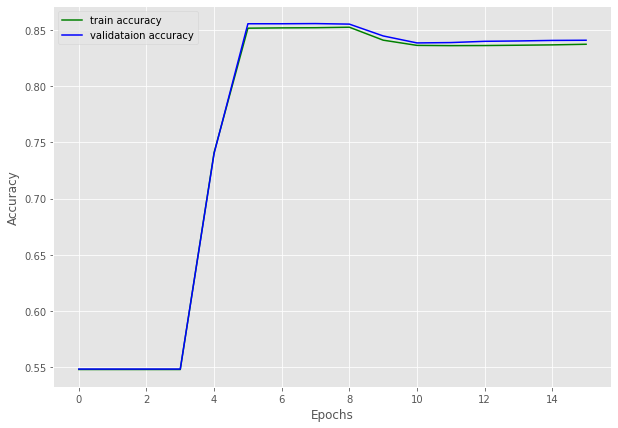

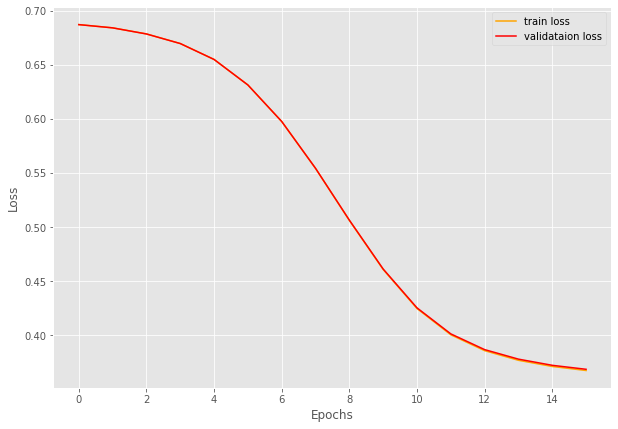

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
param = {"lr": 0.00001, "num_epochs": 17}
run_tuning(param, path, dataset_name, gcn_model, device, train_loader, val_loader, test_loader)

## Training ausführen

In [16]:
param = {"lr": 0.001, "num_epochs": 300}
num_epochs = param["num_epochs"]
lr = param["lr"]

In [17]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

train_results = []
gcn_model = GCN3(hidden_channels=hidden_channel, input_dim = input_dim, num_layer =  num_layer).to(device)
training = Train_GCN(gcn_model, device, lr = lr)

for epoch in range(1, num_epochs):
    _ = training.train(train_loader)
    train_loss, train_acc = training.test(train_loader)
    val_loss, val_acc = training.test(val_loader)
    train_results.append([epoch, train_acc, val_acc, train_loss, val_loss])
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Validation Acc: {val_acc:.4f}, Loss train: {train_loss}, Loss val: {val_loss}')
test_acc = training.test(test_loader)
train_results.append(test_acc)

<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.8642, Validation Acc: 0.8655, Loss train: 0.3247810895470056, Loss val: 0.3265083600131292
Epoch: 002, Train Acc: 0.8646, Validation Acc: 0.8655, Loss train: 0.3171544532884251, Loss val: 0.3186605934585844
Epoch: 003, Train Acc: 0.8666, Validation Acc: 0.8671, Loss train: 0.313546502048319, Loss val: 0.3152305514566482
Epoch: 004, Train Acc: 0.8698, Validation Acc: 0.8691, Loss train: 0.304236018860882, Loss val: 0.3060134393828256
Epoch: 005, Train Acc: 0.8720, Validation Acc: 0.8722, Loss train: 0.3006690720942887, Loss val: 0.30228504443925525
Epoch: 006, Train Acc: 0.8727, Validation Acc: 0.8736, Loss train: 0.2963283467699181, Loss val: 0.29802671926362173
Epoch: 007, Train Acc: 0.8719, Validation Acc: 0.8728, Loss train: 0.3001978511837396, Loss val: 0.30215219703931656
Epoch: 008, Train Acc: 0.8725, Validation Acc: 0.8739, Loss train: 0.29860695268620147, Loss val: 0.30051483568691073
Epoch: 009, Train Acc: 0.8742, Validation Acc: 0.8742, Loss train: 0.

In [18]:
test_acc

(0.2916804370470345, 0.8809675366008911)

In [22]:
# Speichern
path_run = path / f"models/training/{dataset_name}"  
torch.save(gcn_model.state_dict(), path_run /"model")
param["val_loss"] =  train_results[-2][4]
param["val_acc"] = train_results[-2][2]
param["train_loss"] = train_results[-2][3]
param["train_acc"] = train_results[-2][1]
save_hyperparam(param, path / path_run /"param.yml")
joblib.dump(train_results,path_run /"results.joblib")

save Hyperparameter


['/content/drive/MyDrive/Rep_Masterarbeit/XAI_GNN_BPM/models/training/loan_sn_f2_ohe_wEvents_4_nreb/results.joblib']